In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random
from scipy.optimize import curve_fit
from math import factorial
import scipy.stats as stats

import time

save_graph = True

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 90
P = 0.05
G = nx.erdos_renyi_graph(N, P)

G.remove_edges_from([(10, 20), (25, 40)])

while min([d for n, d in G.degree()]) == 0:
    G = nx.erdos_renyi_graph(N, P)

Rappresentazione del grafico

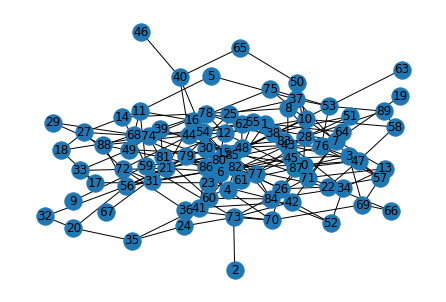

In [3]:
nx.draw(G, with_labels=True)
plt.show()

if save_graph:
    nx.write_adjlist(G, "ER.adjlist")

Distribuzione della connettività dei nodi

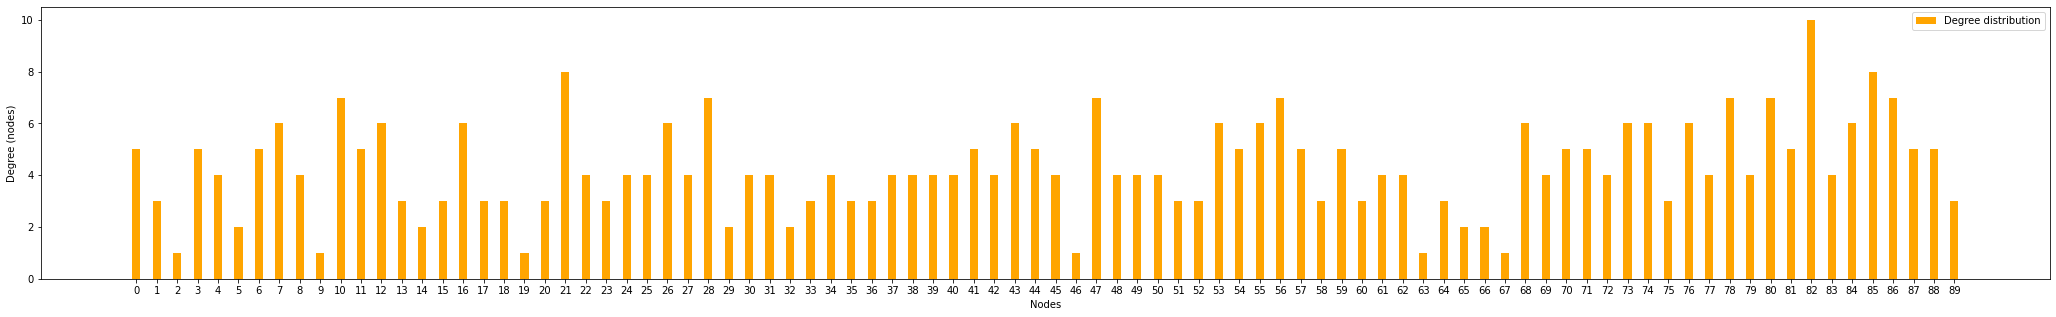

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.4*N, 5))

ax.bar(G.nodes, [d for n,d in G.degree], width=0.4, 
          align='center', color='orange', label='Degree distribution')

ax.legend()
ax.set_xlabel("Nodes")
ax.set_ylabel("Degree (nodes)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

Estrazione della matrice di adiacenza A

In [5]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [6]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [7]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

diff = [np.abs(autovaloriP[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP[i] - 1) == minDiff:
        pS = autovettoriP[i]
        print("Eigenvector found")
        break

if pS[0] < 0:
    pS = -pS

Eigenvector found


In [8]:
autovaloriP

array([ 1.        ,  0.81475124, -0.81811484,  0.78665375,  0.77518426,
        0.75016741, -0.78079181,  0.73086187, -0.75910448, -0.74411623,
       -0.72864884,  0.69556079,  0.68838766,  0.66097286,  0.64167991,
        0.63735207,  0.63327375,  0.61315293,  0.60264751, -0.70486964,
       -0.69012739, -0.67678251,  0.55458065,  0.53793287,  0.51915181,
        0.51033944,  0.49413949,  0.48048894,  0.45069479, -0.62158689,
       -0.61631052, -0.6050299 , -0.5938182 , -0.57852929, -0.56171132,
       -0.55272513,  0.43467006, -0.52081779, -0.50650848, -0.50253863,
       -0.4856867 ,  0.40106497,  0.38900176,  0.35310867,  0.35059119,
        0.32799344,  0.31633901,  0.30530041,  0.28033397,  0.26998422,
       -0.46547493, -0.44409809, -0.43696457, -0.4192643 , -0.4046767 ,
       -0.38028309, -0.37435375, -0.36446026, -0.34683665,  0.23201946,
        0.2151938 ,  0.2105938 ,  0.1894448 ,  0.18085314,  0.15430164,
       -0.3082175 ,  0.1258941 ,  0.11016598,  0.08861093, -0.27

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [9]:
matrixL = np.identity(N) - matrixP

In [10]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)

diff = [np.abs(autovaloriL[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL[i]) == minDiff:
        pS_L = autovettoriL[i]
        FiedlerEigenvalues = list(autovaloriL)
        FiedlerEigenvalues.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L[0] < 0:
    pS_L = -pS_L

Eigenvector found


In [11]:
autovaloriL

array([0.        , 0.18524876, 1.81811484, 0.21334625, 0.22481574,
       1.78079181, 0.24983259, 1.75910448, 0.26913813, 1.74411623,
       1.72864884, 0.30443921, 0.31161234, 0.33902714, 0.35832009,
       0.36264793, 0.36672625, 0.38684707, 0.39735249, 1.70486964,
       1.69012739, 1.67678251, 0.44541935, 0.46206713, 0.48084819,
       0.48966056, 0.50586051, 0.51951106, 1.62158689, 1.61631052,
       1.6050299 , 1.5938182 , 1.57852929, 1.56171132, 1.55272513,
       0.54930521, 0.56532994, 1.52081779, 1.50650848, 1.50253863,
       1.4856867 , 0.59893503, 0.61099824, 1.46547493, 1.44409809,
       1.43696457, 1.4192643 , 1.4046767 , 1.38028309, 1.37435375,
       1.36446026, 1.34683665, 0.64689133, 0.64940881, 0.67200656,
       0.68366099, 0.69469959, 0.71966603, 0.73001578, 1.3082175 ,
       0.76798054, 0.7848062 , 0.7894062 , 0.8105552 , 0.81914686,
       0.84569836, 0.8741059 , 0.88983402, 0.91138907, 1.27969198,
       1.26566148, 1.2510935 , 1.24570338, 1.23208376, 1.22155

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [12]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [14]:
FiedlerValue = round(min(FiedlerEigenvalues), i)
print(FiedlerValue)

0.185248757113


In [15]:
pS = np.round(pS.real, i)
print(pS)

[0.11363636 0.06818182 0.02272727 0.11363636 0.09090909 0.04545455
 0.11363636 0.13636364 0.09090909 0.02272727 0.15909091 0.11363636
 0.13636364 0.06818182 0.04545455 0.06818182 0.13636364 0.06818182
 0.06818182 0.02272727 0.06818182 0.18181818 0.09090909 0.06818182
 0.09090909 0.09090909 0.13636364 0.09090909 0.15909091 0.04545455
 0.09090909 0.09090909 0.04545455 0.06818182 0.09090909 0.06818182
 0.06818182 0.09090909 0.09090909 0.09090909 0.09090909 0.11363636
 0.09090909 0.13636364 0.11363636 0.09090909 0.02272727 0.15909091
 0.09090909 0.09090909 0.09090909 0.06818182 0.06818182 0.13636364
 0.11363636 0.13636364 0.15909091 0.11363636 0.06818182 0.11363636
 0.06818182 0.09090909 0.09090909 0.02272727 0.06818182 0.04545455
 0.04545455 0.02272727 0.13636364 0.09090909 0.11363636 0.11363636
 0.09090909 0.13636364 0.13636364 0.06818182 0.13636364 0.09090909
 0.15909091 0.09090909 0.15909091 0.11363636 0.22727273 0.09090909
 0.13636364 0.18181818 0.15909091 0.11363636 0.11363636 0.0681

In [16]:
if save_graph:
    np.savetxt("ER-pS.txt", pS, delimiter='\n')

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [17]:
walker_per_node = 1000

start_node = 20
walkers = int(5e4)

In [18]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [19]:
history = [[], [], []]
for h in range(len(history)):
#     history[h] = [[walker_per_node] * len(G.nodes)]
    history[h] = [[0] * len(G.nodes)]
    history[h][0][start_node] = walkers

In [20]:
time_steps = int(5e1)

In [21]:
t0 = time.time()

for h in range(len(history)):
    for n in G.nodes:
#         G.nodes[n]['N_i'] = walker_per_node
        G.nodes[n]['N_i'] = 0
    G.nodes[start_node]['N_i'] = walkers
    
    for t in range(time_steps):
        dynamic_evolution(G, history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 1 minutes and 45.56543159484863 seconds


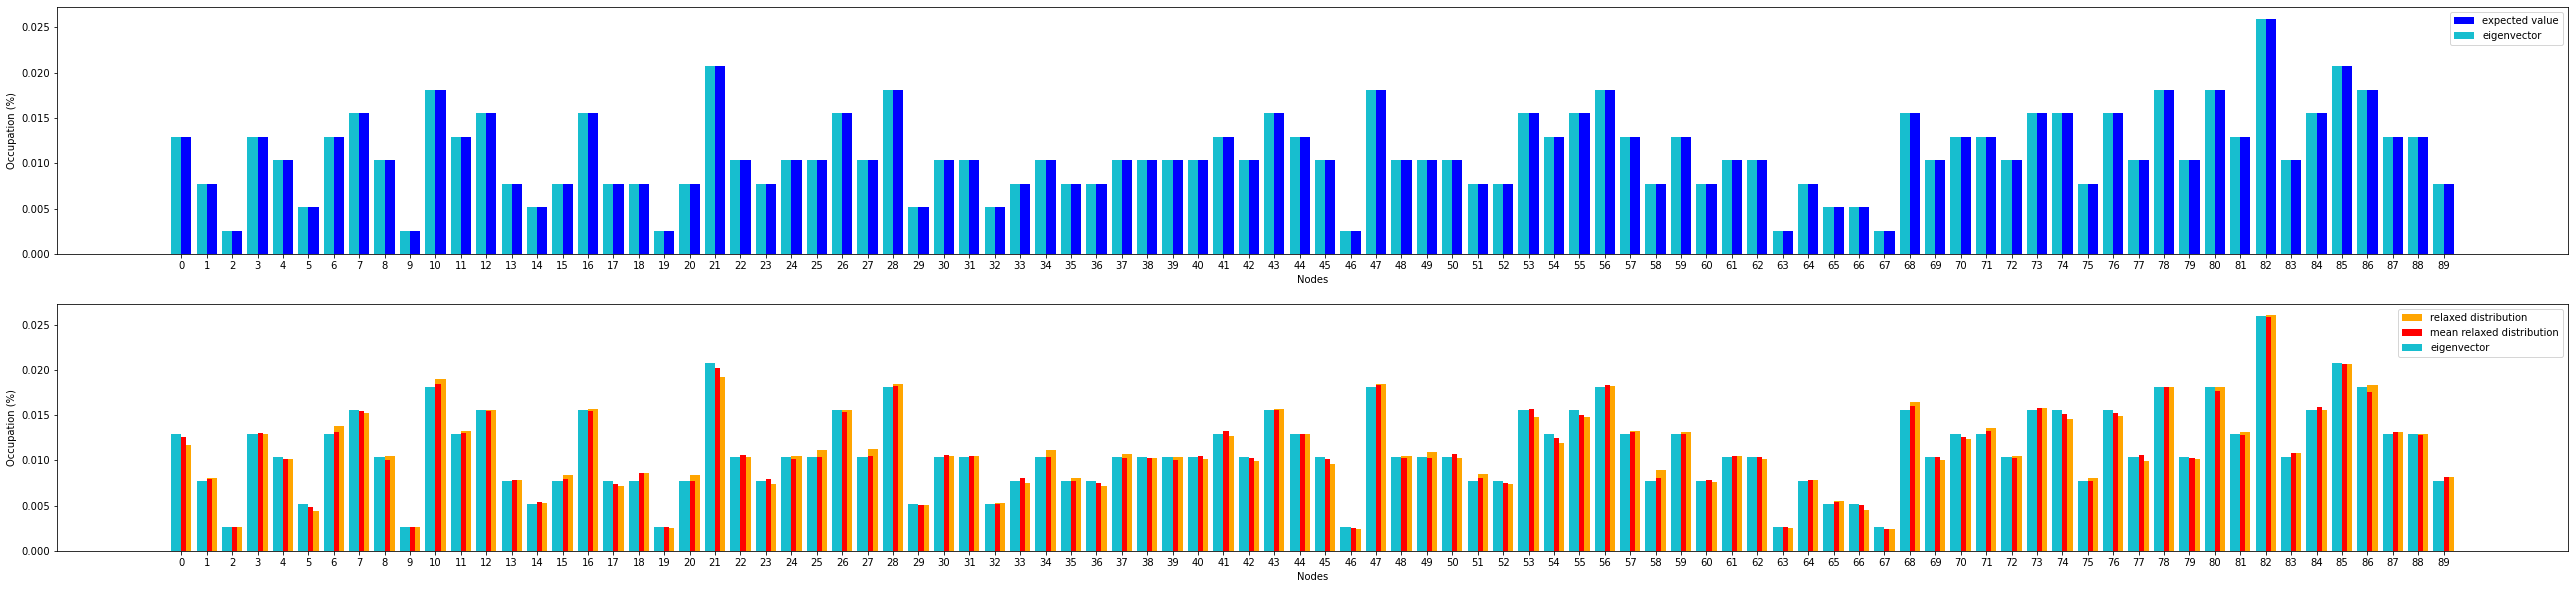

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.5*N, 10))

pSExpected = [d for n, d in G.degree()]
pSNorm = [h/sum(pS) for h in pS]

total_walkers = sum(history[0][0])

hMean = [[(h1+h2+h3)/total_walkers/3 
          for h1, h2, h3 in zip(history[0][i], history[1][i], history[2][i])] 
         for i in range(len(history[0]))]

ax[0].bar(G.nodes, [h/sum(pSExpected) for h in pSExpected], width=0.4, align='edge', color='blue', label="expected value")
ax[0].bar(G.nodes, [h for h in pSNorm], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

ax[1].bar(G.nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax[1].bar(G.nodes, hMean[-1], width=0.2, align='edge', color='red', label='mean relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)

plt.show()

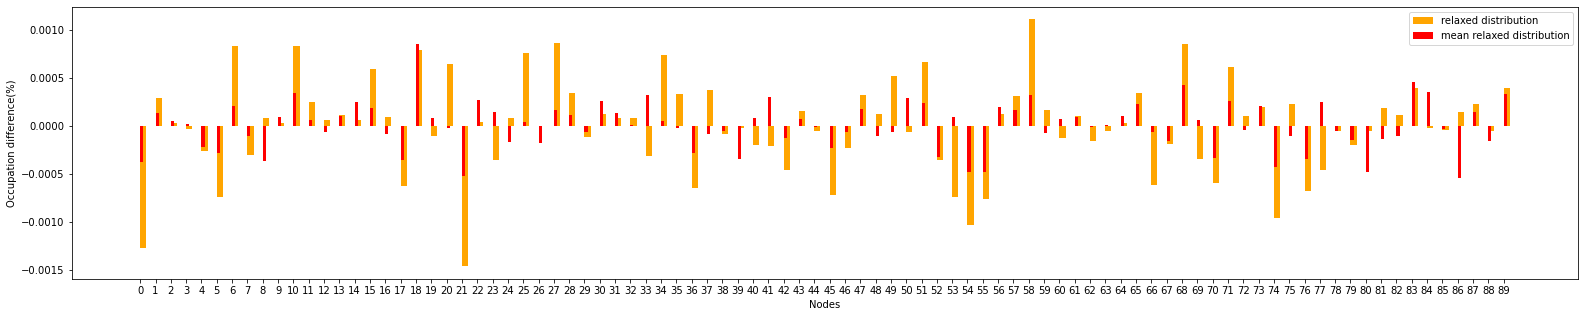

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.3*N, 5))

ax.bar(G.nodes, [h/sum(history[0][-1]) - k for h, k in zip(history[0][-1], pSNorm)], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax.bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1])) - k
                    for h1, h2, h3, k in zip(history[0][-1], history[1][-1], history[2][-1], pSNorm)],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')

ax.legend()
ax.set_xlabel("Nodes")
ax.set_ylabel("Occupation difference(%)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

In [24]:
def gaus_law(x, a, mu=0, sigma=1):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

from scipy.stats import binom
from scipy.stats import poisson

def binomial_law(x, n, p):
    return binom.pmf(x, n, p)

def poisson_law(x, a, lamb):
    return a*poisson.pmf(x, lamb)

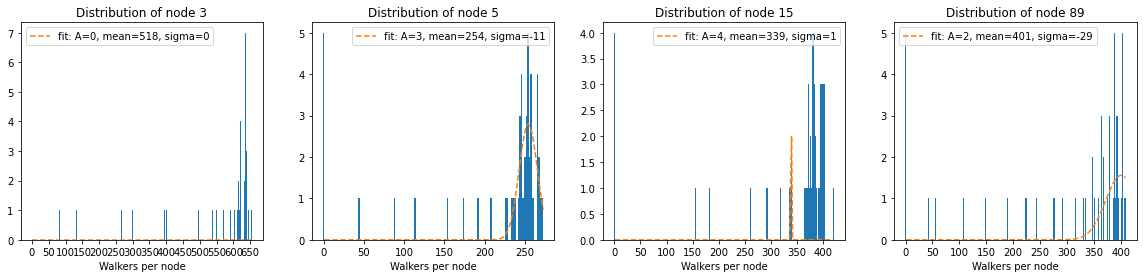

In [25]:
nodes = [3, 5, 15, N-1]
p_node = []

fig, ax = plt.subplots(nrows = 1, ncols = len(nodes), figsize=(5*len(nodes), 4))

histo = [[(h1+h2+h3)/3 for h1, h2, h3 in zip(history[0][i], history[1][i], history[2][i])] 
         for i in range(len(history[0]))]

n = [0]*len(nodes)
bins = [0]*len(nodes)

for i in range(len(nodes)):
    p_node += [[int(h[nodes[i]]) for h in histo]]
    n[i], bins[i], patches = ax[i].hist(p_node[i],
                                        bins = int((max(p_node[i]) - min(p_node[i]))/2),
                                        align='left')
    ax[i].set_title(f"Distribution of node {nodes[i]}")
    ax[i].set_xlabel("Walkers per node")
    ax[i].set_xticks(np.arange(min(p_node[i]), max(p_node[i]), 50))
    
mean = [sum(p_node[i])/len(p_node[i]) for i in range(len(nodes))]

poptGaus = [0]*len(nodes)
pcovGaus = [0]*len(nodes)

bins = [(bins[i][:-1] + bins[i][1:])/2 for i in range(len(nodes))]

for i in range(len(nodes)):    
    poptGaus[i], pcovGaus[i] = curve_fit(gaus_law, bins[i], n[i], 
                                         p0 = [10, mean[i], 9])
    
    ax[i].plot(bins[i], gaus_law(bins[i], *poptGaus[i]), '--',
               label = f"fit: A={round(poptGaus[i][0])}, mean={round(poptGaus[i][1])}, sigma={round(poptGaus[i][2])}")
    ax[i].legend()
#     print(stats.chisquare(n[i],gaus_law(bins[i], *poptGaus[i])))
plt.show()

In [26]:
for i in range(len(nodes)):
    print("Distribution for node", nodes[i], ":")
    print(" - Data mean:", mean[i])
    print(" - Expected mean from eigenvector:", pSNorm[nodes[i]] * total_walkers)
    print(" - Mean from gaussian fit:", poptGaus[i][1])
    print(" - Std.dev. from gaussian fit:", poptGaus[i][2])
#     print(" - Amplitude from poissonian fit:", poptPois[i][0])
#     Me = poptB[i][0] * poptB[i][1]
#     print(" - Mean from binomial fit:", Me)
    print()

Distribution for node 3 :
 - Data mean: 513.6078431372549
 - Expected mean from eigenvector: 647.6683937826036
 - Mean from gaussian fit: 518.1550192786608
 - Std.dev. from gaussian fit: -0.4536001087203815

Distribution for node 5 :
 - Data mean: 212.52941176470588
 - Expected mean from eigenvector: 259.06735751269946
 - Mean from gaussian fit: 254.37892618618736
 - Std.dev. from gaussian fit: -11.350189931266526

Distribution for node 15 :
 - Data mean: 340.5686274509804
 - Expected mean from eigenvector: 388.60103626933414
 - Mean from gaussian fit: 338.98168414127105
 - Std.dev. from gaussian fit: 0.7230237945695042

Distribution for node 89 :
 - Data mean: 306.6078431372549
 - Expected mean from eigenvector: 388.60103626933414
 - Mean from gaussian fit: 401.0119656994911
 - Std.dev. from gaussian fit: -29.20091565522374



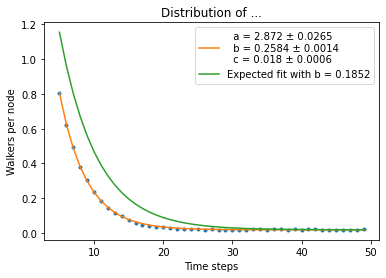

In [27]:
def exp_law(x, a, b, c):
    return a*np.exp(-b*x) +c

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4))

time_evolution = [[h1 for h1 in hMean[i]] for i in range(len(history[0]))]
time = np.arange(5, 50)

y = [sum([np.abs(time_evolution[t][n] - pSNorm[n]) for n in G.nodes]) for t in time]

popt, pcov = curve_fit(exp_law, time, y, p0=[1, FiedlerValue, 0])
err = np.sqrt(np.diag(pcov))

ax.plot(time, y, '.')
ax.plot(time, exp_law(time, *popt), '-',
           label = f"  a = {round(popt[0],4)} ± {round(err[0], 4)}\n" + 
                   f"  b = {round(popt[1],4)} ± {round(err[1], 4)}\n" +
                   f"  c = {round(popt[2],4)} ± {round(err[2], 4)}")
ax.plot(time, exp_law(time, popt[0], FiedlerValue, popt[2]), '-',
           label = f"Expected fit with b = {round(FiedlerValue, 4)}")

ax.set_title(f"Distribution of ...")
ax.set_xlabel("Time steps")
ax.set_ylabel("Walkers per node")

# plt.yscale('log')
ax.legend()

plt.show()

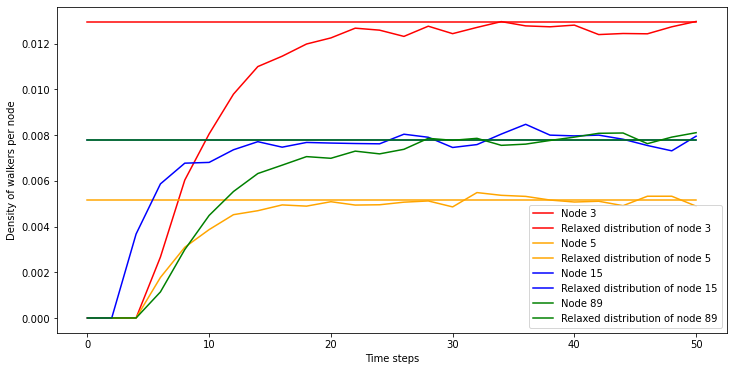

Evolution of 50 time steps starting from 1000 walker per node


In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,1.5*len(nodes)))
color = ['red', 'orange', 'blue', 'green']

time_evolution = hMean
time = np.arange(0, len(time_evolution), 2)

col = 0
for i in nodes: #list(G.nodes)[0:3]:
    ax.plot(time, [time_evolution[ind][i] for ind in time], label = f"Node {i}", color = color[col])
    ax.plot(time, [pSNorm[i]]*len(time), label = f"Relaxed distribution of node {i}", color = color[col])
    col += 1
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.legend()

plt.show()

print(f"Evolution of {time_steps} time steps starting from {walker_per_node} walker per node")

NOTE:
 - Scendendo a P = 0.05 si rischia spesso di acere due nodi connessi fra loro e sconnessi del resto del network, il che fa fallire la dinamica nel caso in cui il nodo iniziale sia proprio uno di questi due.